In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import pickle
import os

In [ ]:
from google.colab import files
files.upload()

Saving Key_Factors_Dataset.csv to Key_Factors_Dataset.csv


{'Key_Factors_Dataset.csv': b'Product  Name,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies\r\nBanana,2,15,16,20,1,25,3,2,3,4,4,3,5,4,2,4,1,4\r\nLemon,1,15,16,20,1,25,3,3,4,4,2,4,5,5,1,2,2,5\r\nBrinjal,0.5,50,30,60,2,70,5,3,3,3,3,3,3,3,2,4,3,4\r\nBasil,0.5,20,30,25,1,30,4,2,4,4,1,4,3,4,3,3,3,3\r\nPumpkin,1,15,10,18,3,20,3,3,2,4,2,3,2,3,4,4,3,4\r\nPalwal,1,35,10,40,2,45,3,3,3,3,3,3,3,4,3,4,3,4\r\nPapaya,1,15,10,18,1,20,2,3,3,4,1,4,4,3,2,4,2,4\r\nRed Leafy,0.5,5,30,7,2,10,2,3,3,2,2,2,4,3,2,3,2,3\r\nOnion,1,30,10,36,1,40,3,3,4,3,3,4,5,5,4,5,1,5\r\nCollard greens,1,5,1,7,1,10,2,5,2,2,2,4,4,2,2,2,1,2\r\nGhee Kanchan,1,5,1,7,3,10,2,4,2,2,1,4,4,2,2,2,3,2\r\nGreen C

In [ ]:
df =pd.read_csv('Key_Factors_Dataset.csv')
df.shape

(142, 19)

In [ ]:
df

,Product Name,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies
0,Banana,2.0,15,16.0,20,1,25,3,2,3,4,4,3,5,4,2,4,1,4
1,Lemon,1.0,15,16.0,20,1,25,3,3,4,4,2,4,5,5,1,2,2,5
2,Brinjal,0.5,50,30.0,60,2,70,5,3,3,3,3,3,3,3,2,4,3,4
3,Basil,0.5,20,30.0,25,1,30,4,2,4,4,1,4,3,4,3,3,3,3
4,Pumpkin,1.0,15,10.0,18,3,20,3,3,2,4,2,3,2,3,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Arum lobe,4.0,12,15.0,15,1,20,5,3,5,5,2,3,2,2,2,3,3,4
138,Arum,3.0,15,1.0,18,14,25,2,3,3,4,2,2,2,3,2,3,3,2
139,Ladies finger,2.0,25,11.0,32,10,35,2,2,3,3,3,4,3,2,2,4,3,3
140,Cauliflower,1.0,45,13.0,60,9,70,3,2,5,3,4,3,4,1,3,4,2,4


In [ ]:
df.head(10)

,Product Name,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies
0,Banana,2.0,15,16.0,20,1,25,3,2,3,4,4,3,5,4,2,4,1,4
1,Lemon,1.0,15,16.0,20,1,25,3,3,4,4,2,4,5,5,1,2,2,5
2,Brinjal,0.5,50,30.0,60,2,70,5,3,3,3,3,3,3,3,2,4,3,4
3,Basil,0.5,20,30.0,25,1,30,4,2,4,4,1,4,3,4,3,3,3,3
4,Pumpkin,1.0,15,10.0,18,3,20,3,3,2,4,2,3,2,3,4,4,3,4
5,Palwal,1.0,35,10.0,40,2,45,3,3,3,3,3,3,3,4,3,4,3,4
6,Papaya,1.0,15,10.0,18,1,20,2,3,3,4,1,4,4,3,2,4,2,4
7,Red Leafy,0.5,5,30.0,7,2,10,2,3,3,2,2,2,4,3,2,3,2,3
8,Onion,1.0,30,10.0,36,1,40,3,3,4,3,3,4,5,5,4,5,1,5
9,Collard greens,1.0,5,1.0,7,1,10,2,5,2,2,2,4,4,2,2,2,1,2


In [ ]:
df.tail(10)

,Product Name,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies
132,Bottol gourd,0.5,20,14.0,25,3,35,3,3,3,5,5,4,5,5,3,4,4,4
133,Brinjal,4.0,40,10.0,42,64,45,3,3,3,2,4,4,4,4,4,4,3,4
134,Bitter gourd,2.0,40,19.0,45,11,50,5,4,4,3,4,3,4,3,2,3,4,3
135,Ridge Gourd,3.0,20,3.0,25,10,30,3,4,3,4,4,4,4,3,2,4,5,4
136,Papaya,1.5,5,15.0,10,5,15,5,3,4,5,3,4,3,1,3,2,3,4
137,Arum lobe,4.0,12,15.0,15,1,20,5,3,5,5,2,3,2,2,2,3,3,4
138,Arum,3.0,15,1.0,18,14,25,2,3,3,4,2,2,2,3,2,3,3,2
139,Ladies finger,2.0,25,11.0,32,10,35,2,2,3,3,3,4,3,2,2,4,3,3
140,Cauliflower,1.0,45,13.0,60,9,70,3,2,5,3,4,3,4,1,3,4,2,4
141,Cabbage,2.0,20,10.0,30,12,40,3,2,3,5,4,1,4,2,3,3,2,4


In [ ]:
df.columns

Index(['Product  Name', 'Farmers Distance', 'Farmers Seling Price',
       'Wholesalers distance', 'Wholesalers selling price',
       'Retailers distance', 'Retailers selling price', 'High Cost Product',
       'Market Structure', 'Power imbalance', 'Lack of information',
       'Limited access to finance', 'inadequate logistic',
       'Lack of policy support', 'Dependence on middlemen', 'Climate Change',
       'Inadequate govt support', 'Quality and Grading',
       'Market power of intermedianies'],
      dtype='object')

In [ ]:
df.isnull().sum()

Product  Name                     0
Farmers Distance                  0
Farmers Seling Price              0
Wholesalers distance              0
Wholesalers selling price         0
Retailers distance                0
Retailers selling price           0
High Cost Product                 0
Market Structure                  0
Power imbalance                   0
Lack of information               0
Limited access to finance         0
inadequate logistic               0
Lack of policy support            0
Dependence on middlemen           0
Climate Change                    0
Inadequate govt support           0
Quality and Grading               0
Market power of intermedianies    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product  Name                   142 non-null    object 
 1   Farmers Distance                142 non-null    float64
 2   Farmers Seling Price            142 non-null    int64  
 3   Wholesalers distance            142 non-null    float64
 4   Wholesalers selling price       142 non-null    int64  
 5   Retailers distance              142 non-null    int64  
 6   Retailers selling price         142 non-null    int64  
 7   High Cost Product               142 non-null    int64  
 8   Market Structure                142 non-null    int64  
 9   Power imbalance                 142 non-null    int64  
 10  Lack of information             142 non-null    int64  
 11  Limited access to finance       142 non-null    int64  
 12  inadequate logistic             142 

In [ ]:
df.describe

<bound method NDFrame.describe of      Product  Name  Farmers Distance  Farmers Seling Price  \
0           Banana               2.0                    15   
1            Lemon               1.0                    15   
2          Brinjal               0.5                    50   
3            Basil               0.5                    20   
4          Pumpkin               1.0                    15   
..             ...               ...                   ...   
137      Arum lobe               4.0                    12   
138           Arum               3.0                    15   
139  Ladies finger               2.0                    25   
140    Cauliflower               1.0                    45   
141        Cabbage               2.0                    20   

     Wholesalers distance  Wholesalers selling price  Retailers distance  \
0                    16.0                         20                   1   
1                    16.0                         20                 

In [ ]:
df.nunique

<bound method DataFrame.nunique of      Product  Name  Farmers Distance  Farmers Seling Price  \
0           Banana               2.0                    15   
1            Lemon               1.0                    15   
2          Brinjal               0.5                    50   
3            Basil               0.5                    20   
4          Pumpkin               1.0                    15   
..             ...               ...                   ...   
137      Arum lobe               4.0                    12   
138           Arum               3.0                    15   
139  Ladies finger               2.0                    25   
140    Cauliflower               1.0                    45   
141        Cabbage               2.0                    20   

     Wholesalers distance  Wholesalers selling price  Retailers distance  \
0                    16.0                         20                   1   
1                    16.0                         20                

<Axes: >

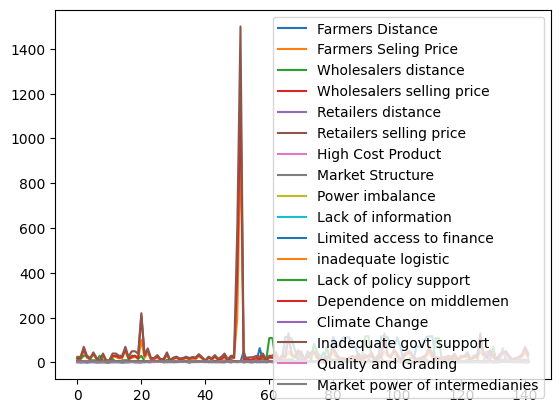

In [ ]:
df.plot()

In [ ]:
df['High Cost Product'].unique()

array([3, 5, 4, 2])

In [ ]:

value_counts = df['High Cost Product'].value_counts()
print(value_counts)


3    62
5    36
4    23
2    21
Name: High Cost Product, dtype: int64


In [ ]:
df = df.replace({"High Cost Product": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Market Structure": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Power imbalance": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Lack of information": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Limited access to finance": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "inadequate logistic": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Lack of policy support": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Dependence on middlemen": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Climate Change": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Inadequate govt. support": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Quality and Grading": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5},
                 "Market power of intermediaries": {'Low': 1, '2': 2, 'Medium': 3, 'High': 4, '5': 5}})

In [ ]:
import plotly.express as px
fig=px.box(df,y="Farmers Distance",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Farmers Seling Price",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Wholesalers distance",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Wholesalers selling price",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Retailers distance",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Retailers selling price",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="High Cost Product",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Market Structure",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Power imbalance",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Lack of information",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Limited access to finance",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="inadequate logistic",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Lack of policy support",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Dependence on middlemen",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Climate Change",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Inadequate govt support",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Quality and Grading",points="all")
fig.show()

In [ ]:
import plotly.express as px
fig=px.box(df,y="Market power of intermedianies",points="all")
fig.show()

In [ ]:
df_boston = df
df_boston.columns = df_boston.columns
df_boston.head()


,Product Name,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies
0,Banana,2.0,15,16.0,20,1,25,3,2,3,4,4,3,5,4,2,4,1,4
1,Lemon,1.0,15,16.0,20,1,25,3,3,4,4,2,4,5,5,1,2,2,5
2,Brinjal,0.5,50,30.0,60,2,70,5,3,3,3,3,3,3,3,2,4,3,4
3,Basil,0.5,20,30.0,25,1,30,4,2,4,4,1,4,3,4,3,3,3,3
4,Pumpkin,1.0,15,10.0,18,3,20,3,3,2,4,2,3,2,3,4,4,3,4


In [ ]:
q1=np.percentile(df_boston['High Cost Product'],25,interpolation='midpoint')
q3=np.percentile(df_boston['High Cost Product'],25,interpolation='midpoint')
iqr=q3-q1
print("old shape:",df_boston.shape)
uper=np.where(df_boston['High Cost Product']>=(q3+1.5*iqr))
lower=np.where(df_boston['High Cost Product']>=(q3-1.5*iqr))

old shape: (142, 19)


<ipython-input-35-e349eb4c0b73>:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-35-e349eb4c0b73>:2: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



In [ ]:
q1 = df_boston['High Cost Product'].quantile(0.25)
q3 = df_boston['High Cost Product'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

outliers_upper = df_boston['High Cost Product'] >= upper_bound
outliers_lower = df_boston['High Cost Product'] <= lower_bound

df_boston = df_boston[~(outliers_upper | outliers_lower)]

print("New Shape:", df_boston.shape)


New Shape: (142, 19)


In [ ]:
df=df_boston
import matplotlib.pyplot as plt
import seaborn as sns

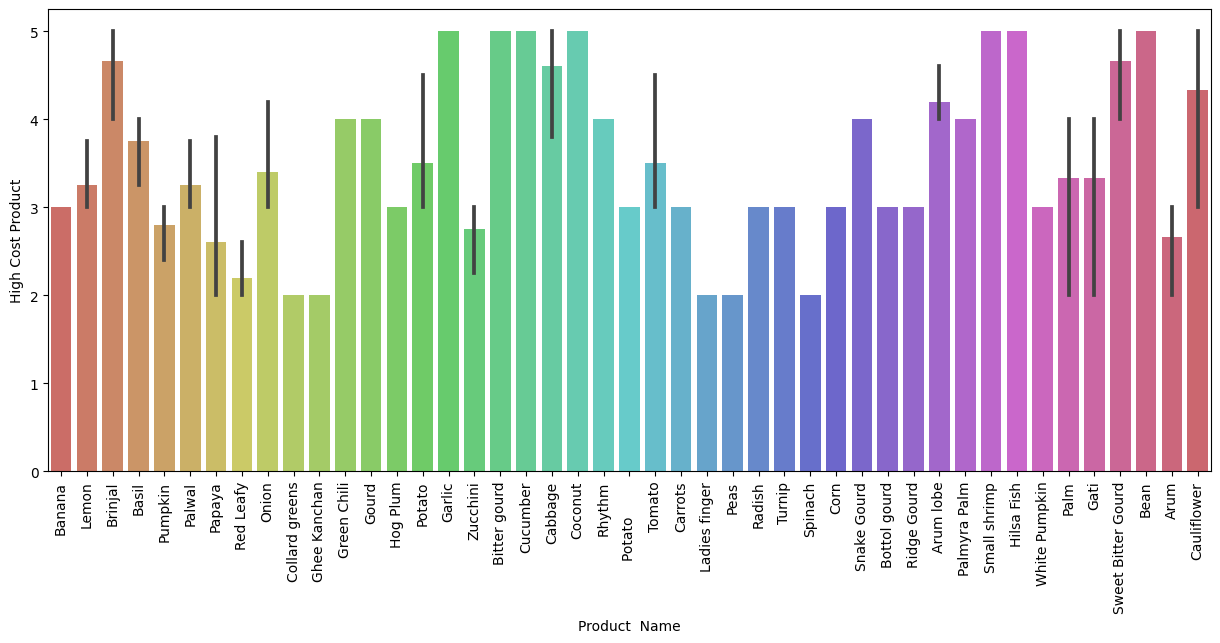

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(y='High Cost Product', x='Product  Name', data=df, palette='hls')

plt.xticks(rotation=90)
plt.show()


In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies
Farmers Distance,1.000000,-0.039162,-0.067166,-0.025459,-0.099396,-0.029700,0.087932,0.027842,0.090717,-0.082622,-0.060980,-0.013805,-0.195047,0.170285,0.016802,-0.078223,0.197311,0.029804
Farmers Seling Price,-0.039162,1.000000,-0.029319,0.987340,0.011811,0.978592,0.216380,0.036632,0.105172,0.042122,-0.002620,-0.017924,0.147360,0.162743,-0.063665,0.089532,-0.044535,0.147052
Wholesalers distance,-0.067166,-0.029319,1.000000,-0.026350,0.004782,-0.027887,0.147516,0.024671,-0.054555,0.143927,0.037366,0.112424,0.124155,0.179205,0.010603,-0.017904,0.060585,0.102801
Wholesalers selling price,-0.025459,0.987340,-0.026350,1.000000,0.000449,0.996727,0.242795,0.042268,0.102840,0.049242,0.002689,0.008336,0.164867,0.172687,-0.084210,0.104014,-0.058171,0.143221
Retailers distance,-0.099396,0.011811,0.004782,0.000449,1.000000,-0.005204,-0.003244,0.040916,-0.025259,-0.071185,0.066662,0.130753,-0.069040,-0.172964,0.090471,0.057098,-0.043367,0.065794
Retailers selling price,-0.029700,0.978592,-0.027887,0.996727,-0.005204,1.000000,0.234270,0.041091,0.098457,0.058900,0.004802,0.013813,0.169774,0.167973,-0.098627,0.099612,-0.049531,0.131097
High Cost Product,0.087932,0.216380,0.147516,0.242795,-0.003244,0.234270,1.000000,-0.097196,0.335042,0.172757,-0.009320,0.111313,0.051135,0.124902,-0.030830,0.146830,0.027334,0.240336
Market Structure,0.027842,0.036632,0.024671,0.042268,0.040916,0.041091,-0.097196,1.000000,-0.085938,-0.450944,0.139194,-0.262313,0.046216,0.002844,0.082367,-0.001501,-0.081934,-0.004490
Power imbalance,0.090717,0.105172,-0.054555,0.102840,-0.025259,0.098457,0.335042,-0.085938,1.000000,0.009432,0.057886,0.095979,0.007819,0.388913,0.140159,0.115980,-0.143684,0.474656
Lack of information,-0.082622,0.042122,0.143927,0.049242,-0.071185,0.058900,0.172757,-0.450944,0.009432,1.000000,-0.008478,0.455405,0.044748,0.103611,0.035734,-0.058065,0.080962,0.112209


<ipython-input-40-249da678a50c>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



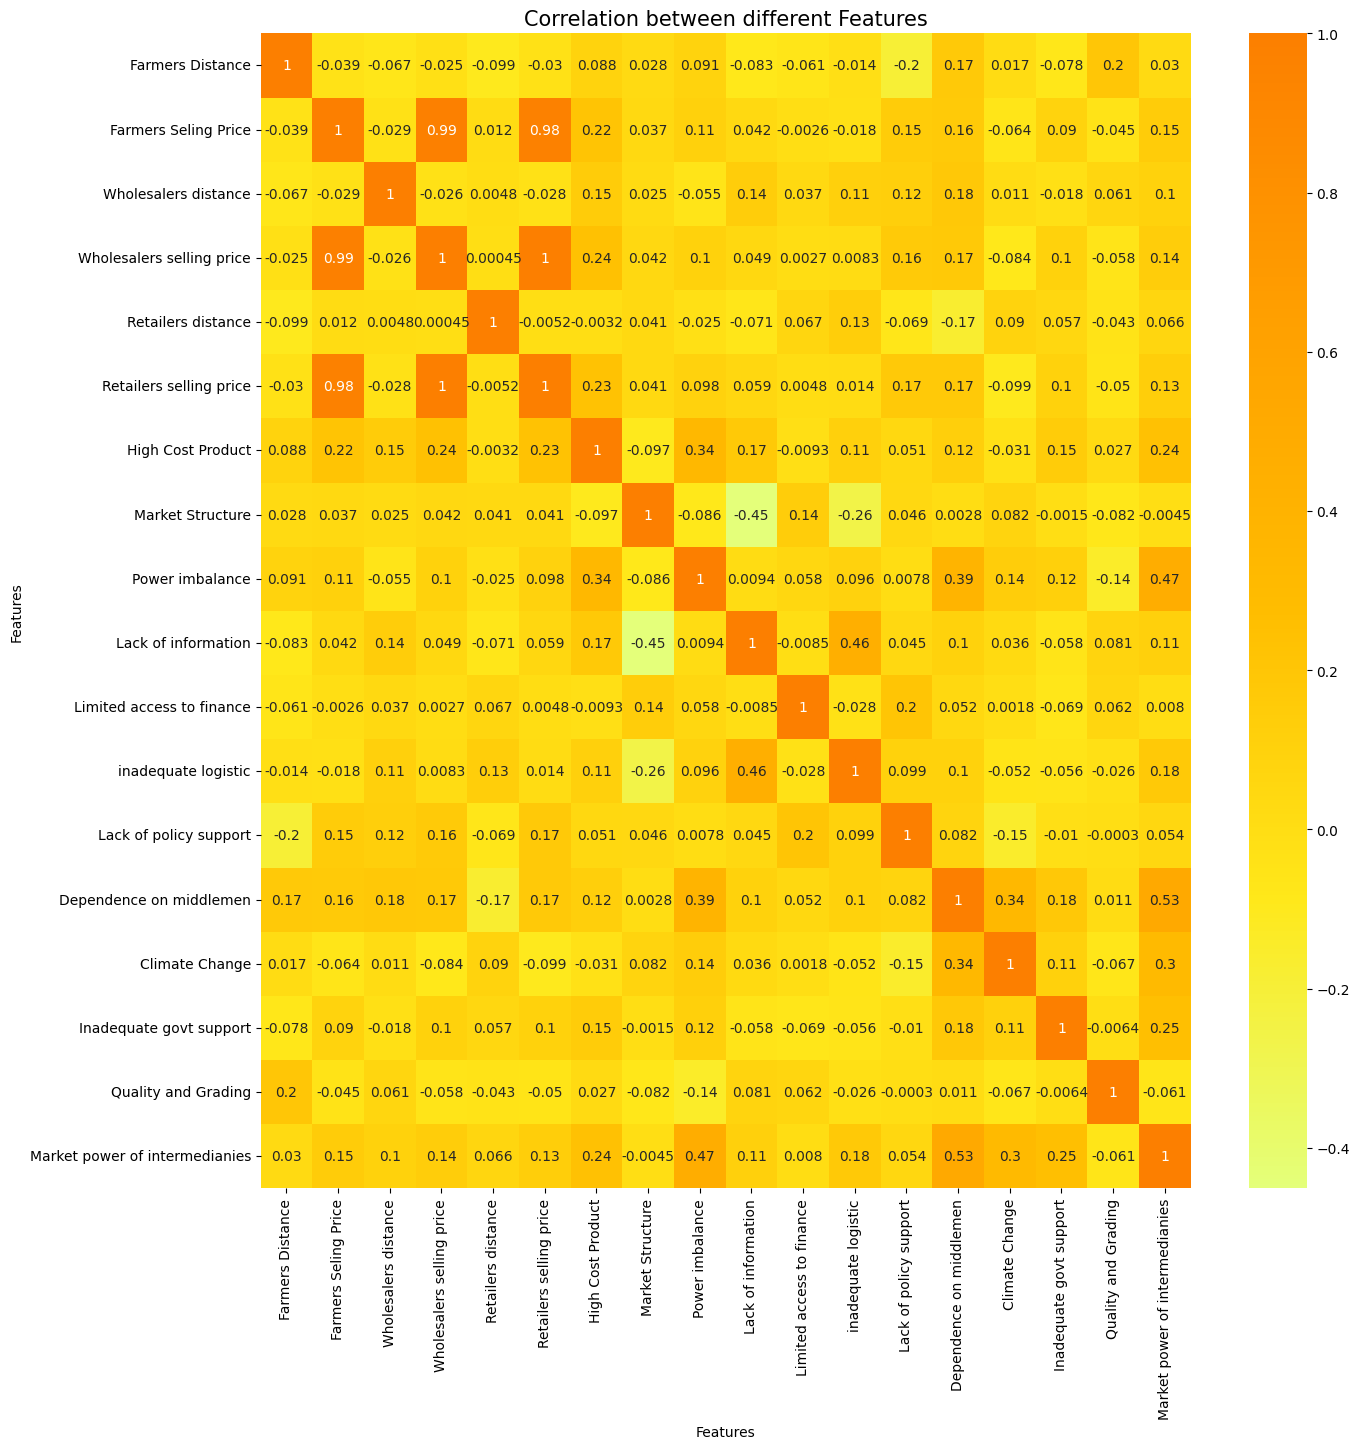

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='Wistia')
ax.set(xlabel='Features')
ax.set(ylabel='Features')

plt.title('Correlation between different Features', fontsize=15, color='black')
plt.show()


In [ ]:
pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x=df.drop('Product  Name',axis=1)
y=df['Product  Name']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,shuffle=True)

In [ ]:
import lightgbm as lgb
model=lgb.LGBMClassifier()
model.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)


In [ ]:
print('Lightgbm model accuracy score: {}'.format(accuracy_score(y_test, y_pred)))


Lightgbm model accuracy score: 0.4418604651162791


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)

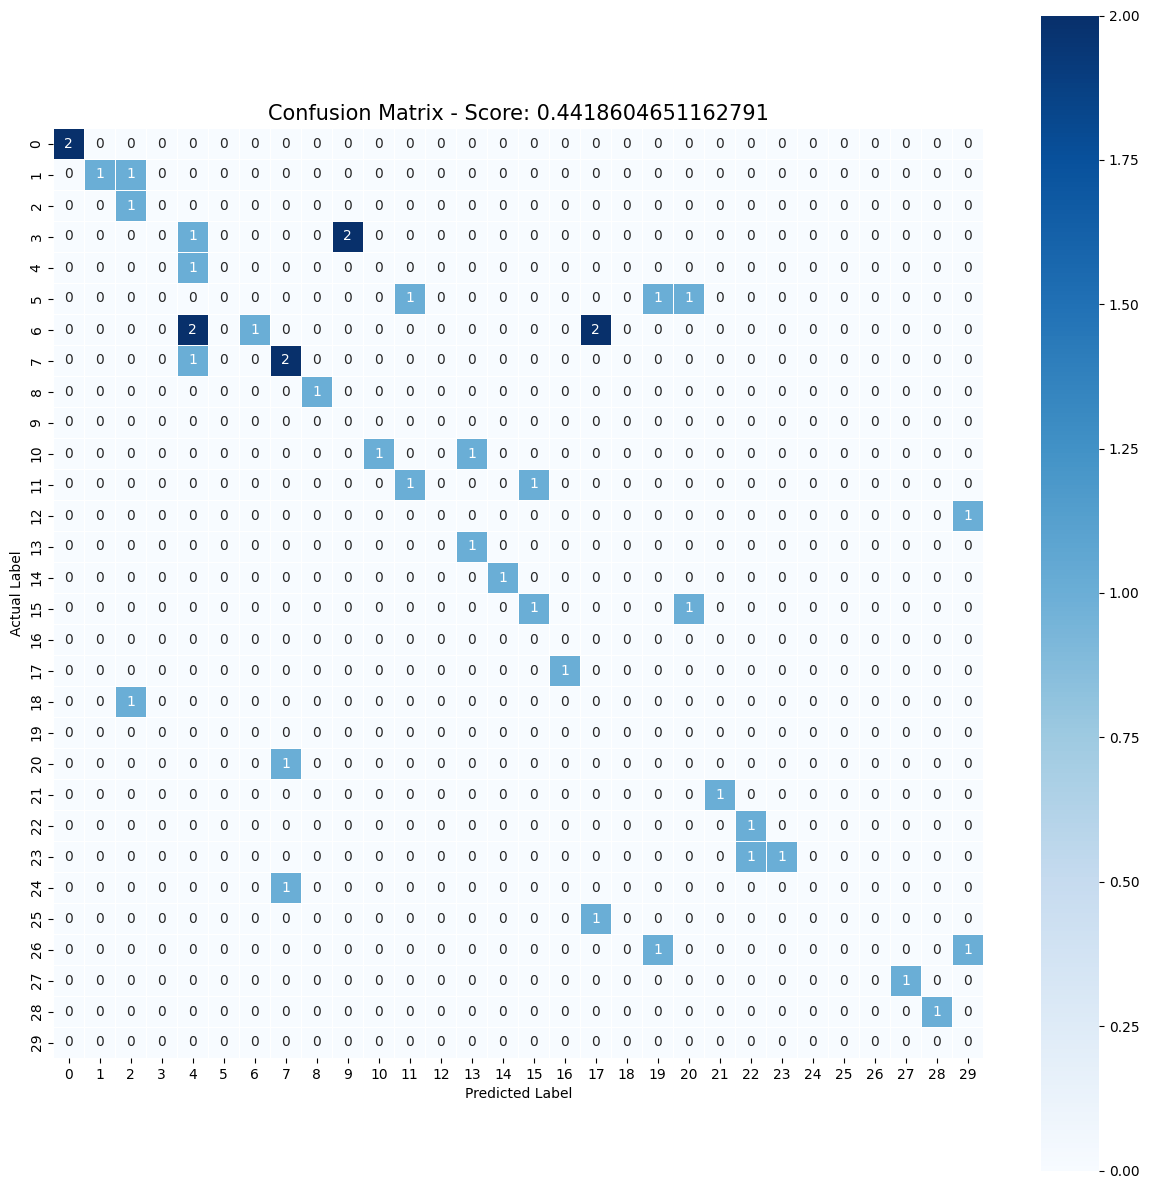

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Confusion Matrix - Score: ' + str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

         Arum lobe       1.00      1.00      1.00         2
            Banana       1.00      0.50      0.67         2
             Basil       0.33      1.00      0.50         1
              Bean       0.00      0.00      0.00         3
      Bitter gourd       0.20      1.00      0.33         1
      Bottol gourd       0.00      0.00      0.00         3
           Brinjal       1.00      0.20      0.33         5
           Cabbage       0.50      0.67      0.57         3
           Carrots       1.00      1.00      1.00         1
       Cauliflower       0.00      0.00      0.00         0
            Garlic       1.00      0.50      0.67         2
              Gati       0.50      0.50      0.50         2
             Gourd       0.00      0.00      0.00         1
       Green Chili       0.50      1.00      0.67         1
          Hog Plum       1.00      1.00      1.00         1
     Ladies finger       0.50      0.50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [ ]:
x=np.nan_to_num(x_train)
y=np.nan_to_num(y_train)

In [ ]:
Classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=Classifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [ ]:
print('Decision tree model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Decision tree model accuracy score: 0.4651


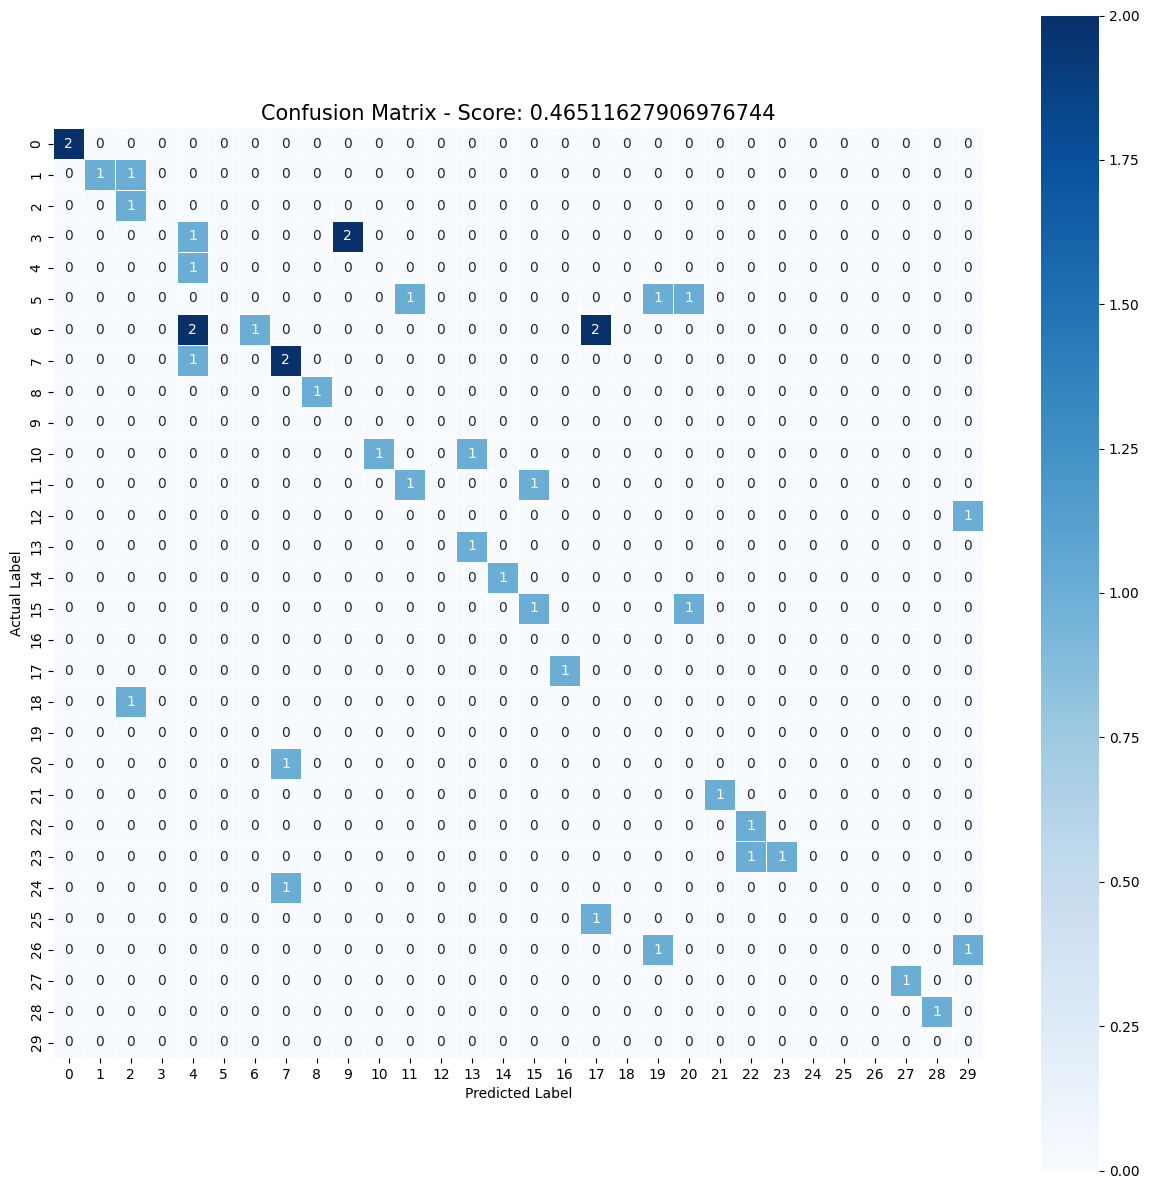

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Confusion Matrix - Score: ' + str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()


In [ ]:
x_test[0:1]

,Farmers Distance,Farmers Seling Price,Wholesalers distance,Wholesalers selling price,Retailers distance,Retailers selling price,High Cost Product,Market Structure,Power imbalance,Lack of information,Limited access to finance,inadequate logistic,Lack of policy support,Dependence on middlemen,Climate Change,Inadequate govt support,Quality and Grading,Market power of intermedianies
63,1.0,10,4.0,12,2,15,2,3,3,2,3,2,2,3,2,5,3,3


In [ ]:
result=Classifier.predict(x_test[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [ ]:
result

array(['Red Leafy'], dtype=object)

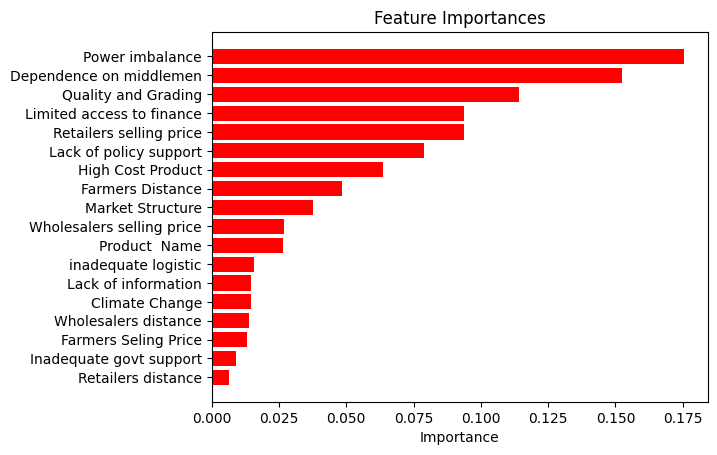

In [ ]:


# Get the feature importances
importances = Classifier.feature_importances_
# Plot the feature importances
features = df.columns
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='r', align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# High Cost Product---------------------------------------------------------


# Select the single column as the target variable
target_column = 'High Cost Product'  # Replace 'your_target_column' with the column name you want to predict
y = df['High Cost Product']

# Drop the target column to get the input features
X = df.drop('High Cost Product', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_high_cost_product.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.4827586206896552


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Market Structure---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Market Structure'  # Replace 'your_target_column' with the column name you want to predict
y = df['Market Structure']

# Drop the target column to get the input features
X = df.drop('Market Structure', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_market_structure.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.3793103448275862


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Power imbalance ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Power imbalance'  # Replace 'your_target_column' with the column name you want to predict
y = df['Power imbalance']

# Drop the target column to get the input features
X = df.drop('Power imbalance', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Power_imbalance.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.6551724137931034


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Lack of information ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Lack of information'  # Replace 'your_target_column' with the column name you want to predict
y = df['Lack of information']

# Drop the target column to get the input features
X = df.drop('Lack of information', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Lack_of_information.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.4482758620689655


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Limited access to finance ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Limited access to finance'  # Replace 'your_target_column' with the column name you want to predict
y = df['Limited access to finance']

# Drop the target column to get the input features
X = df.drop('Limited access to finance', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Limited_access_to_finance.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

saved model
Accuracy: 0.3448275862068966


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# inadequate logistic ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'inadequate logistic'  # Replace 'your_target_column' with the column name you want to predict
y = df['inadequate logistic']

# Drop the target column to get the input features
X = df.drop('inadequate logistic', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_inadequate_logistic.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.5172413793103449


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Lack of policy support ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Lack of policy support'  # Replace 'your_target_column' with the column name you want to predict
y = df['Lack of policy support']

# Drop the target column to get the input features
X = df.drop('Lack of policy support', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Lack_of_policy_support.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



saved model
Accuracy: 0.4482758620689655


In [ ]:

# Dependence on middlemen ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Dependence on middlemen'  # Replace 'your_target_column' with the column name you want to predict
y = df['Dependence on middlemen']

# Drop the target column to get the input features
X = df.drop('Dependence on middlemen', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Dependence_on_middlemen.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.4827586206896552


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Climate Change ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Climate Change'  # Replace 'your_target_column' with the column name you want to predict
y = df['Climate Change']

# Drop the target column to get the input features
X = df.drop('Climate Change', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Climate_Change.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.4482758620689655


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Inadequate govt support ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Inadequate govt support'  # Replace 'your_target_column' with the column name you want to predict
y = df['Inadequate govt support']

# Drop the target column to get the input features
X = df.drop('Inadequate govt support', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Inadequate_govt_support.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


saved model
Accuracy: 0.20689655172413793


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Quality and Grading ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Quality and Grading'  # Replace 'your_target_column' with the column name you want to predict
y = df['Quality and Grading']

# Drop the target column to get the input features
X = df.drop('Quality and Grading', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Quality_and_Grading.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

saved model
Accuracy: 0.4482758620689655


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:

# Market power of intermedianies ---------------------------------------------------------


# Select the single column as the target variable
target_column = 'Market power of intermedianies'  # Replace 'your_target_column' with the column name you want to predict
y = df['Market power of intermedianies']

# Drop the target column to get the input features
X = df.drop('Market power of intermedianies', axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
filename = 'logistic_regression_model_Market_power_of_intermedianies.pkl'  # Specify the desired filename and extension
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("saved model")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



saved model
Accuracy: 0.4482758620689655


In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error



# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the base models from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

base_estimator = LogisticRegression(max_iter=500)

# Create a bagging model
bagging_model = BaggingRegressor(base_estimator=base_estimator) # Change n_estimators to the desired number of models

# Train the bagging model
bagging_model.fit(X_train, y_train)  # Replace X_train and y_train with your training data and labels

# Make predictions
y_pred = bagging_model.predict(X_test)  # Replace X_test with your test data

# Evaluate the performance of the bagging model
mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your test labels
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the do

Mean Squared Error: 0.6120689655172413


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Select the single column as the target variable
target_columns = ['High Cost Product', 'Market Structure', 'Power imbalance', 'Lack of information',
                  'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                  'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                  'Market power of intermedianies']
y = df[target_columns]

# Drop the target columns to get the input features
X = df.drop(target_columns, axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the weak learners (base models) from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

# Create a boosting model
boosting_model = AdaBoostRegressor(base_models, n_estimators=10)  # Change n_estimators to the desired number of iterations

# Train the boosting model
boosting_model.fit(X_train, y_train)  # Replace X_train and y_train with your training data and labels

# Make predictions
y_pred = boosting_model.predict(X_test)  # Replace X_test with your test data

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your test labels
print("Mean Squared Error:", mse)


InvalidParameterError: ignored

In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Select the single column as the target variable
target_column = 'High Cost Product'
y = df[target_columns]

# Drop the target columns to get the input features
X = df.drop(target_columns, axis=1)

y = y.astype(float)  # Convert y to float type
y_pred = y_pred.astype(float)  # Convert y_pred to float type
# Apply one-hot encoding to categorical columns

X_encoded = pd.get_dummies(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the weak learners (base models) from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

# Create a boosting model
boosting_model = AdaBoostRegressor(base_estimator=LogisticRegression(), n_estimators=10)

# Set the base models as the weak learners within the AdaBoost model
boosting_model.estimators_ = base_models

# Train the boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = boosting_model.predict(X_test)

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to c

Mean Squared Error: 1.206896551724138


In [ ]:
df.columns

Index(['Product  Name', 'Farmers Distance', 'Farmers Seling Price',
       'Wholesalers distance', 'Wholesalers selling price',
       'Retailers distance', 'Retailers selling price', 'High Cost Product',
       'Market Structure', 'Power imbalance', 'Lack of information',
       'Limited access to finance', 'inadequate logistic',
       'Lack of policy support', 'Dependence on middlemen', 'Climate Change',
       'Inadequate govt support', 'Quality and Grading',
       'Market power of intermedianies'],
      dtype='object')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Select the target columns
target_columns = ['High Cost Product','Market Structure', 'Power imbalance', 'Lack of information',
                  'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                  'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                  'Market power of intermedianies']

# Train a bagging model for each target column
models = {}
for column in target_columns:
    # Create a bagging model with decision tree as the base estimator
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier())

    # Train the model on the corresponding target column
    model.fit(X_train, y_train[column])

    # Store the trained model
    models[column] = model

# Predict for each target column using the trained models
predictions = {}
for column, model in models.items():
    # Make predictions using the corresponding model
    y_pred = model.predict(X_test)

    # Store the predictions
    predictions[column] = y_pred

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



KeyError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Select the target columns
target_columns = ['High Cost Product']

# Train a boosting model for each target column
models = {}
for column in target_columns:
    # Create a boosting model with decision tree as the base estimator
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

    # Train the model on the corresponding target column
    model.fit(X_train, y_train[column])

    # Store the trained model
    models[column] = model

# Predict for each target column using the trained models
predictions = {}
for column, model in models.items():
    # Make predictions using the corresponding model
    y_pred = model.predict(X_test)

    # Store the predictions
    predictions[column] = y_pred

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0689655172413792


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [ ]:
print(y_train.columns)


Index(['High Cost Product'], dtype='object')


In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Select the single column as the target variable
target_columns = ['High Cost Product', 'Market Structure', 'Power imbalance', 'Lack of information',
                  'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                  'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                  'Market power of intermedianies']
y = df[target_columns]

# Drop the target columns to get the input features
X = df.drop(target_columns, axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the weak learners (base models) from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

# Create a boosting model
boosting_model = AdaBoostRegressor(base_estimator=LogisticRegression(), n_estimators=10)

# Set the base models as the weak learners within the AdaBoost model
boosting_model.estimators_ = base_models

# Train the boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = boosting_model.predict(X_test)

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



ValueError: ignored

In [ ]:

print(y_train.columns)
print(X_train.columns)

print("Shape of y_train:", y_train.shape)
print("Shape of X_train:", X_train.shape)


missing_values = y_train.isnull().sum()
print("Missing values in y_train:\n", missing_values)
missing_values = X_train.isnull().sum()
print("Missing values in X_train:\n", missing_values)

Index(['High Cost Product', 'Market Structure', 'Power imbalance',
       'Lack of information', 'Limited access to finance',
       'inadequate logistic', 'Lack of policy support',
       'Dependence on middlemen', 'Climate Change', 'Inadequate govt support',
       'Quality and Grading', 'Market power of intermedianies'],
      dtype='object')
Index(['Farmers Distance', 'Farmers Seling Price', 'Wholesalers distance',
       'Wholesalers selling price', 'Retailers distance',
       'Retailers selling price', 'Product  Name_Arum',
       'Product  Name_Arum lobe', 'Product  Name_Banana',
       'Product  Name_Basil', 'Product  Name_Bean',
       'Product  Name_Bitter gourd', 'Product  Name_Bottol gourd',
       'Product  Name_Brinjal', 'Product  Name_Cabbage',
       'Product  Name_Carrots', 'Product  Name_Cauliflower',
       'Product  Name_Coconut', 'Product  Name_Collard greens',
       'Product  Name_Corn', 'Product  Name_Cucumber', 'Product  Name_Garlic',
       'Product  Name_Gat

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert target columns into a binary matrix
mlb = MultiLabelBinarizer()
y_train_binary = mlb.fit_transform(y_train.values)

# Verify the shape of y_train_binary
print(y_train_binary.shape)


(113, 6)


In [ ]:
import numpy as np

# Assuming your array is named 'my_array'
my_array_1d = np.ravel(y_train)

# Verify the shape of the 1D array
print(my_array_1d.shape)


(1356,)


In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

import pandas as pd

# Define the column names
column_names = ['High Cost Product', 'Market Structure', 'Power imbalance', 'Lack of information',
                'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                'Market power of intermedianies']

# Calculate the total number of elements
total_elements = 113 * 12

# Create a 1D array with values ranging from 1 to total_elements + 1
data = np.arange(1, total_elements + 1)

# Reshape the array to match the desired shape of (113, 12)
reshaped_data = data.reshape(113, 12)

# Create a DataFrame using the reshaped_data and column_names
df = pd.DataFrame(reshaped_data, columns=column_names)


# Select the single column as the target variable
target_columns = ['High Cost Product', 'Market Structure', 'Power imbalance', 'Lack of information',
                  'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                  'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                  'Market power of intermedianies']
y = df[target_columns]

# Drop the target columns to get the input features
X = df.drop(target_columns, axis=1)






# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np







# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the weak learners (base models) from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

# Create a boosting model
boosting_model = AdaBoostRegressor(base_estimator=LogisticRegression(), n_estimators=10)

# Set the base models as the weak learners within the AdaBoost model
boosting_model.estimators_ = base_models

# Train the boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = boosting_model.predict(X_test)

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



ValueError: ignored

In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Select the single column as the target variable
target_columns = ['High Cost Product', 'Market Structure', 'Power imbalance', 'Lack of information',
                  'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                  'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                  'Market power of intermedianies']
y = df[target_columns]

# Drop the target columns to get the input features
X = df.drop(target_columns, axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

import numpy as np

# Assuming your array is named 'my_array'
my_array_1d_y_train= np.ravel(y_train)
my_array_1d_X_train = np.ravel(X_train)
my_array_1d_X_test = np.ravel(X_test)
my_array_1d_y_test = np.ravel(y_test)


my_array_2d_y_train = my_array_1d_y_train.reshape(-1, 1)
my_array_2d_X_train= my_array_1d_X_train.reshape(-1, 1)
my_array_2d_X_test= my_array_1d_X_test.reshape(-1, 1)
my_array_2d_y_test= my_array_1d_y_test.reshape(-1, 1)

# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the weak learners (base models) from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

# Create a boosting model
boosting_model = AdaBoostRegressor(base_estimator=LogisticRegression(), n_estimators=10)

# Set the base models as the weak learners within the AdaBoost model
boosting_model.estimators_ = base_models

# Train the boosting model
boosting_model.fit(my_array_2d_X_train, my_array_2d_y_train)

# Make predictions
y_pred = boosting_model.predict(my_array_2d_X_test)

# Evaluate the performance of the boosting model
mse = mean_squared_error(my_array_2d_y_test, y_pred)
print("Mean Squared Error:", mse)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ValueError: ignored

In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Select the single column as the target variable
target_columns = ['High Cost Product', 'Market Structure', 'Power imbalance', 'Lack of information',
                  'Limited access to finance', 'inadequate logistic', 'Lack of policy support',
                  'Dependence on middlemen', 'Climate Change', 'Inadequate govt support', 'Quality and Grading',
                  'Market power of intermedianies']
y = df[target_columns]

# Drop the target columns to get the input features
X = df.drop(target_columns, axis=1)

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# List of model file paths
model_files = ["logistic_regression_model_high_cost_product.pkl", "logistic_regression_model_market_structure.pkl", "logistic_regression_model_Power_imbalance.pkl","logistic_regression_model_Lack_of_information.pkl","logistic_regression_model_Limited_access_to_finance.pkl","logistic_regression_model_inadequate_logistic.pkl","logistic_regression_model_Lack_of_policy_support.pkl","logistic_regression_model_Dependence_on_middlemen.pkl","logistic_regression_model_Climate_Change.pkl","logistic_regression_model_Inadequate_govt_support.pkl","logistic_regression_model_Quality_and_Grading.pkl","logistic_regression_model_Market_power_of_intermedianies.pkl"]  # Add the paths of your model files here

# Load the weak learners (base models) from the .pkl files
base_models = []
for model_file in model_files:
    with open(model_file, "rb") as f:
        base_model = pickle.load(f)
        base_models.append(base_model)

# Create a boosting model
boosting_model = AdaBoostRegressor(base_estimator=LogisticRegression(), n_estimators=10)

# Set the base models as the weak learners within the AdaBoost model
boosting_model.estimators_ = base_models

# Train the boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = boosting_model.predict(X_test)

# Evaluate the performance of the boosting model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

